In [1]:
# Part 1 #################################################################################################################
#Step 1: Exploring and Preparing the Data 
import pandas as pd # import the csv file 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
from scipy import stats
input_file = "C:/MyData Late-Spring/530 Machine Learning/data/Absenteeism_at_work_train.csv"
data_abs = pd.read_csv(input_file)

In [2]:
data_abs.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,2


In [3]:
data_abs.rename(columns={'Absenteeism time in hours':'AbsentHrs','Work load Average/day':'WorkloadAverageday'}, inplace=True)

In [4]:
#data.rename(columns={'WorkloadAverageday':'WkloadAvgDay'}, inplace=True)
data_abs.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,AbsentHrs
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,2


In [5]:
data_abs.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                 object
WorkloadAverageday                  object
Hit target                         float64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                             float64
Height                               int64
Body mass index                      int64
AbsentHrs                            int64
dtype: object

In [6]:
#data["Age"] = data.Age.astype(float) there was an error as there was  a string value in Age -- R
#data.drop(data.index[data['Age'] == 'R'], inplace = True)
data_abs.Age = data_abs.Age.replace("R", 0)
data_abs['Age'] = data_abs['Age'].astype('int64')
#data['WorkloadAverageDay'] = data['WorkloadAverageDay'].astype('int')

#data['WorkloadAverageDay'] = pd.to_numeric(data.WorkloadAverageDay)

In [7]:
#data["WorkloadAverageday"] = data.WorkloadAverageday.replace(',', '')
#data["WorkloadAverageday"] = data['WorkloadAverageday'].astype('float')
#data["WorkloadAverageday"] = float(data["WorkloadAverageday"]) # turn from string to float.
# convert X into dataframe
X_pd = pd.DataFrame(data = data_abs.WorkloadAverageday)
# replace all instances of URC with 0 
X_replace = X_pd.replace(',','', regex=True)
# convert it back to numpy array
X_np = X_replace.values
# set the object type as float
X_fa = X_np.astype('float64')
data_abs["WorkloadAverageday"] = X_fa 
data_abs.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
WorkloadAverageday                 float64
Hit target                         float64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                             float64
Height                               int64
Body mass index                      int64
AbsentHrs                            int64
dtype: object

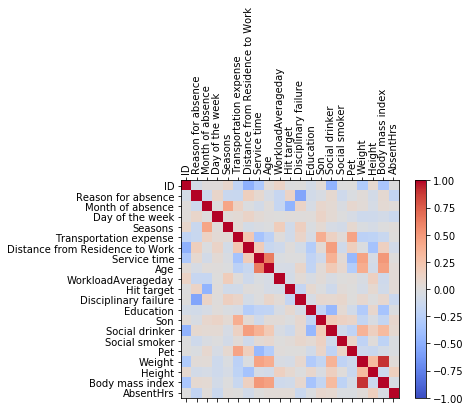

In [8]:
#Step 1: Exploring and Preparing the Data
import matplotlib.pyplot as plt 
import numpy as np
corr = data_abs.corr() 
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0,len(data_abs.columns),1) 
ax.set_xticks(ticks) 
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(data_abs.columns) 
ax.set_yticklabels(data_abs.columns) 
plt.show()

In [9]:
corr

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,AbsentHrs
ID,1.000000,-0.066170,0.012684,0.018396,0.088870,-0.189095,-0.491364,-0.305085,0.037614,0.120963,...,0.006438,-0.064322,0.033437,-0.469397,-0.002147,0.005417,-0.291862,0.063660,-0.332736,-0.000598
Reason for absence,-0.066170,1.000000,-0.111914,0.099040,-0.137639,-0.141621,0.161861,0.069654,-0.051450,-0.148805,...,-0.558132,-0.081430,-0.043375,0.062536,-0.102693,-0.024564,0.029843,-0.074778,0.061005,-0.180259
Month of absence,0.012684,-0.111914,1.000000,0.004240,0.437373,0.132308,-0.018947,-0.072565,0.019811,-0.160389,...,0.113646,-0.050018,0.079872,0.052285,-0.038652,0.076261,0.034756,-0.057025,0.050078,0.017703
Day of the week,0.018396,0.099040,0.004240,1.000000,0.029069,0.042683,0.116683,0.039229,0.012228,0.007131,...,0.008580,0.016223,0.114531,0.048125,-0.004563,-0.048511,-0.110974,-0.104076,-0.075058,-0.125065
Seasons,0.088870,-0.137639,0.437373,0.029069,1.000000,0.045143,-0.066264,-0.031492,-0.012014,0.172171,...,0.152857,-0.027072,0.053561,-0.050882,-0.075274,0.065197,-0.029012,-0.055611,-0.002200,0.019786
Transportation expense,-0.189095,-0.141621,0.132308,0.042683,0.045143,1.000000,0.223869,-0.358992,-0.221958,0.010585,...,0.104920,-0.051692,0.383431,0.135470,0.029017,0.440019,-0.221501,-0.205271,-0.141090,0.001490
Distance from Residence to Work,-0.491364,0.161861,-0.018947,0.116683,-0.066264,0.223869,1.000000,0.180580,-0.143893,-0.101643,...,-0.067029,-0.273278,0.044633,0.470987,-0.097824,0.163670,-0.022827,-0.355407,0.146604,-0.082288
Service time,-0.305085,0.069654,-0.072565,0.039229,-0.031492,-0.358992,0.180580,1.000000,0.631722,-0.030250,...,-0.006394,-0.198962,-0.094296,0.362586,0.044661,-0.435838,0.452538,-0.060166,0.507232,0.001103
Age,0.037614,-0.051450,0.019811,0.012228,-0.012014,-0.221958,-0.143893,0.631722,1.000000,-0.053996,...,0.097056,-0.194737,0.030354,0.201525,0.075900,-0.267543,0.392151,-0.075597,0.455057,0.034038
WorkloadAverageday,0.120963,-0.148805,-0.160389,0.007131,0.172171,0.010585,-0.101643,-0.030250,-0.053996,1.000000,...,0.032294,-0.045229,0.024377,-0.041371,0.003415,0.019082,-0.040458,0.141936,-0.105379,0.037194


In [10]:
del data_abs['Body mass index']

In [11]:
missing_val = pd.DataFrame(data_abs.isna().sum())
missing_val

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
WorkloadAverageday,0


In [12]:
import numpy as np
data_abs[data_abs==np.inf]=np.nan
data_abs.fillna(data_abs.mean(), inplace=True)
#data.fillna(0)
data = data_abs

In [13]:
#three rows where it was blank Hit target 1 and Weight 2 is replaced it with mean values 

ID                                    AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Reason for absence                 AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Month of absence                   AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Day of the week                       AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Seasons                            AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
Transportation expense             AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
Distance from Residence to Work       AxesSubplot(0.125,0.606915;0.227941x0.0803191)
Service time                       AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Age                                AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
WorkloadAverageday                    AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Hit target                         AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Disciplinary failure               AxesSubplot(0.672059,0.510532;

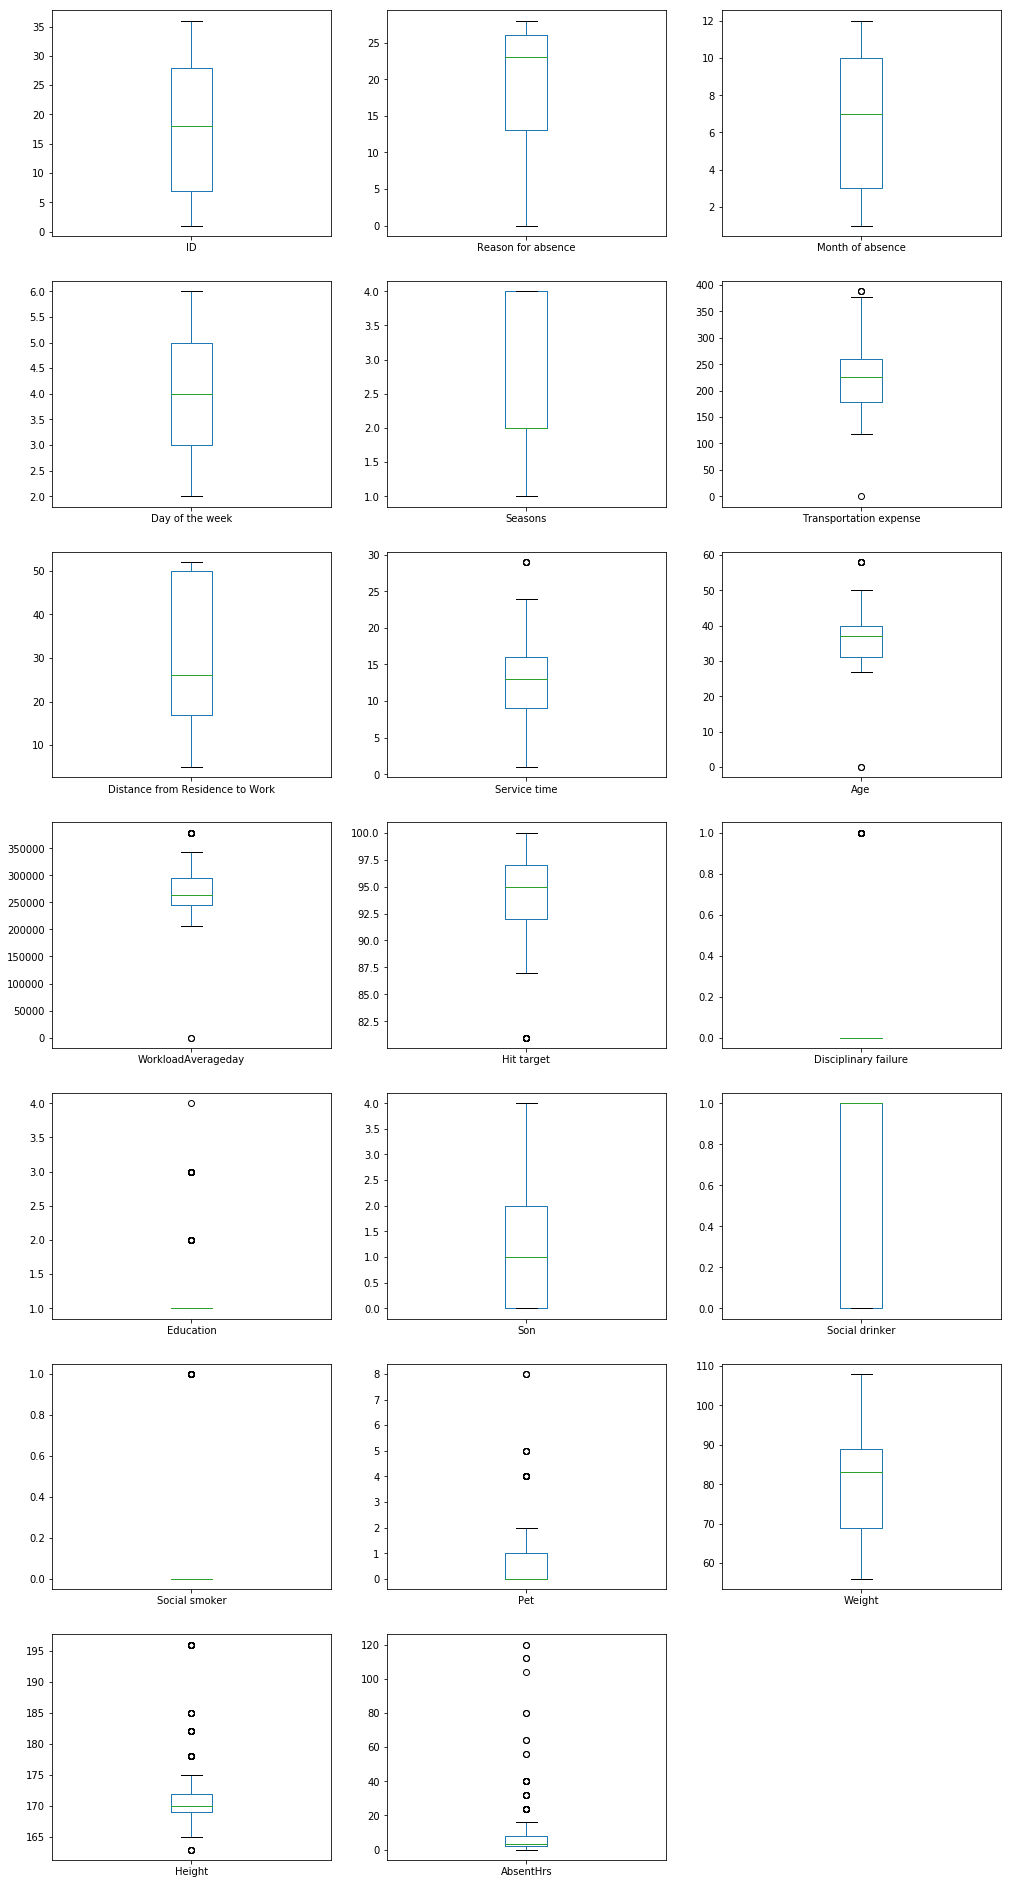

In [14]:
data_abs.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)

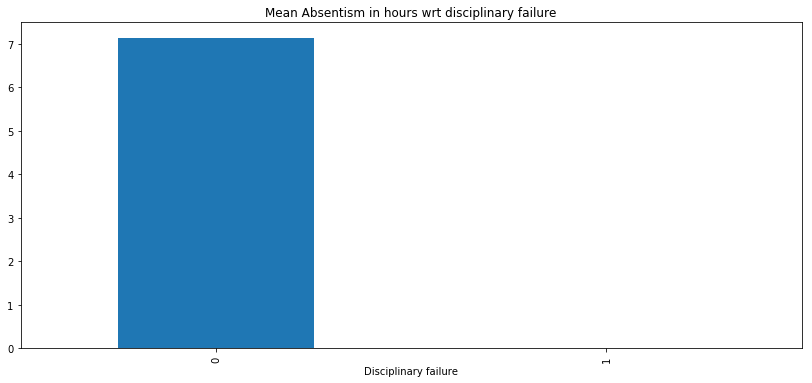

In [15]:
data_abs.groupby('Disciplinary failure')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours wrt disciplinary failure',figsize=(14,6))
plt.show()

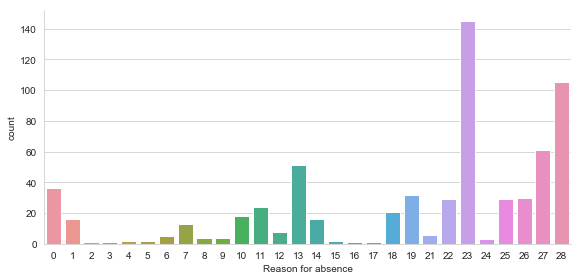

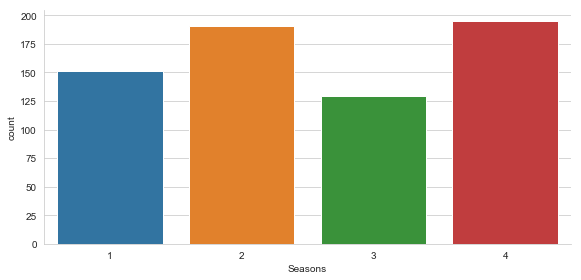

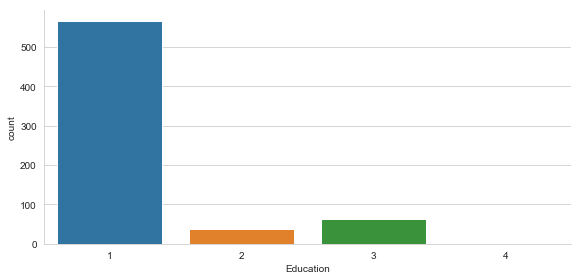

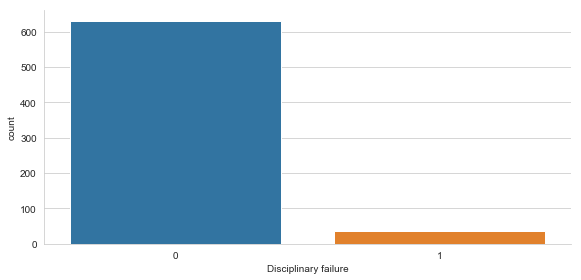

In [16]:
import warnings
warnings.filterwarnings("ignore")

#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=data_abs, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data_abs, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data_abs, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data_abs, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

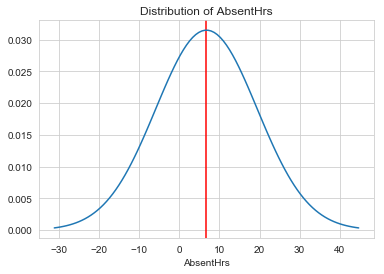

In [17]:
mu = data_abs['AbsentHrs'].mean() 
sigma = data_abs['AbsentHrs'].std() 
x = np.linspace(mu-3*sigma, mu+3*sigma, 100) 
plt.axvline(x=mu,color='r') 
plt.plot(x, norm.pdf(x,mu,sigma)) 
plt.title('Distribution of AbsentHrs')
plt.xlabel('AbsentHrs')
plt.show()

In [18]:
data_abs_new = data_abs[(np.abs(stats.zscore(data_abs)) < 3).all(axis=1)] 

data_abs_new.describe() 

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,AbsentHrs
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.0,525.000000,525.000000,525.000000,525.0,525.000000,525.000000,525.000000,525.000000
mean,17.820952,20.982857,6.382857,3.923810,2.558095,224.297143,31.754286,12.358095,35.680000,270954.348571,94.831258,0.0,1.257143,0.920000,0.567619,0.0,0.657143,78.771830,170.670476,5.409524
std,11.443786,7.014549,3.636658,1.440256,1.126941,65.471392,14.798991,4.182086,5.932547,39074.291844,3.086352,0.0,0.648377,1.143051,0.495879,0.0,1.009767,12.001806,3.129517,5.810453
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,10.000000,3.000000,27.000000,205917.000000,87.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,56.000000,165.000000,0.000000
25%,5.000000,15.000000,3.000000,3.000000,2.000000,179.000000,25.000000,9.000000,30.000000,244387.000000,93.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,69.000000,169.000000,2.000000
50%,20.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,12.000000,37.000000,264249.000000,95.000000,0.0,1.000000,1.000000,1.000000,0.0,0.000000,83.000000,170.000000,3.000000
75%,28.000000,27.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,38.000000,284853.000000,97.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,89.000000,172.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,18.000000,50.000000,378884.000000,100.000000,0.0,3.000000,4.000000,1.000000,0.0,4.000000,106.000000,182.000000,40.000000


In [19]:
print('Number of dropped instances= ',data_abs.shape[0]-data_abs_new.shape[0])

Number of dropped instances=  141


In [20]:
data = data_abs_new

target = data['AbsentHrs']

In [21]:
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
hrs_label = pd.Series(label_encoder.fit_transform(target>6))

In [22]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
Grp0 = (data.AbsentHrs == 0)
x = data.AbsentHrs > 0
y = data.AbsentHrs <= 6 
Grp1 = np.logical_and(x, y)
Grp2 = data.AbsentHrs > 6


data.loc[Grp2,'AbsentHrs'] = 2
data.loc[Grp1,'AbsentHrs'] = 1
data.loc[Grp0,'AbsentHrs'] = 0

Grp0.value_counts()

False    524
True       1
Name: AbsentHrs, dtype: int64

In [23]:
target = data[data.keys()[-1]]

In [24]:
#Next, use a 75%/25% split for training and test data, i.e. use 75% of the records for the training set and 25% of the
#records for the test set. Report the number of missing values you find in the data in your results report. Use the 
#randomization seed of 123.
from sklearn.model_selection import train_test_split 
y = target 
X = data.drop(['AbsentHrs'],axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [26]:
#If the randomization went well then the percentages between splits should be close.
#Before we checked on the number of defaults for both training and test.This time we want to see the percentage of each: 
y_train.value_counts()/y_train.shape

1    0.633333
2    0.364286
0    0.002381
Name: AbsentHrs, dtype: float64

In [27]:
y_test.value_counts()/y_test.shape

1    0.647619
2    0.352381
Name: AbsentHrs, dtype: float64

In [28]:
# Design decision tree 
# Design decision tree 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
model = tree.DecisionTreeClassifier() 
model = model.fit(X_train, y_train)

In [29]:
#Step 4: Evaluating Model Performance
#We still need to use our test set to evaluate/validate the model’s overall performance. 
#To do this we’ll use the predict() command as follows:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test) 
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[55 13]
 [12 25]]
76.19047619047619


In [30]:
#To get the basic information about the tree, you can export the information of the model to a .dot file. 
from sklearn.tree import export_graphviz 
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(model, out_file ='tree.dot', feature_names =X.columns)

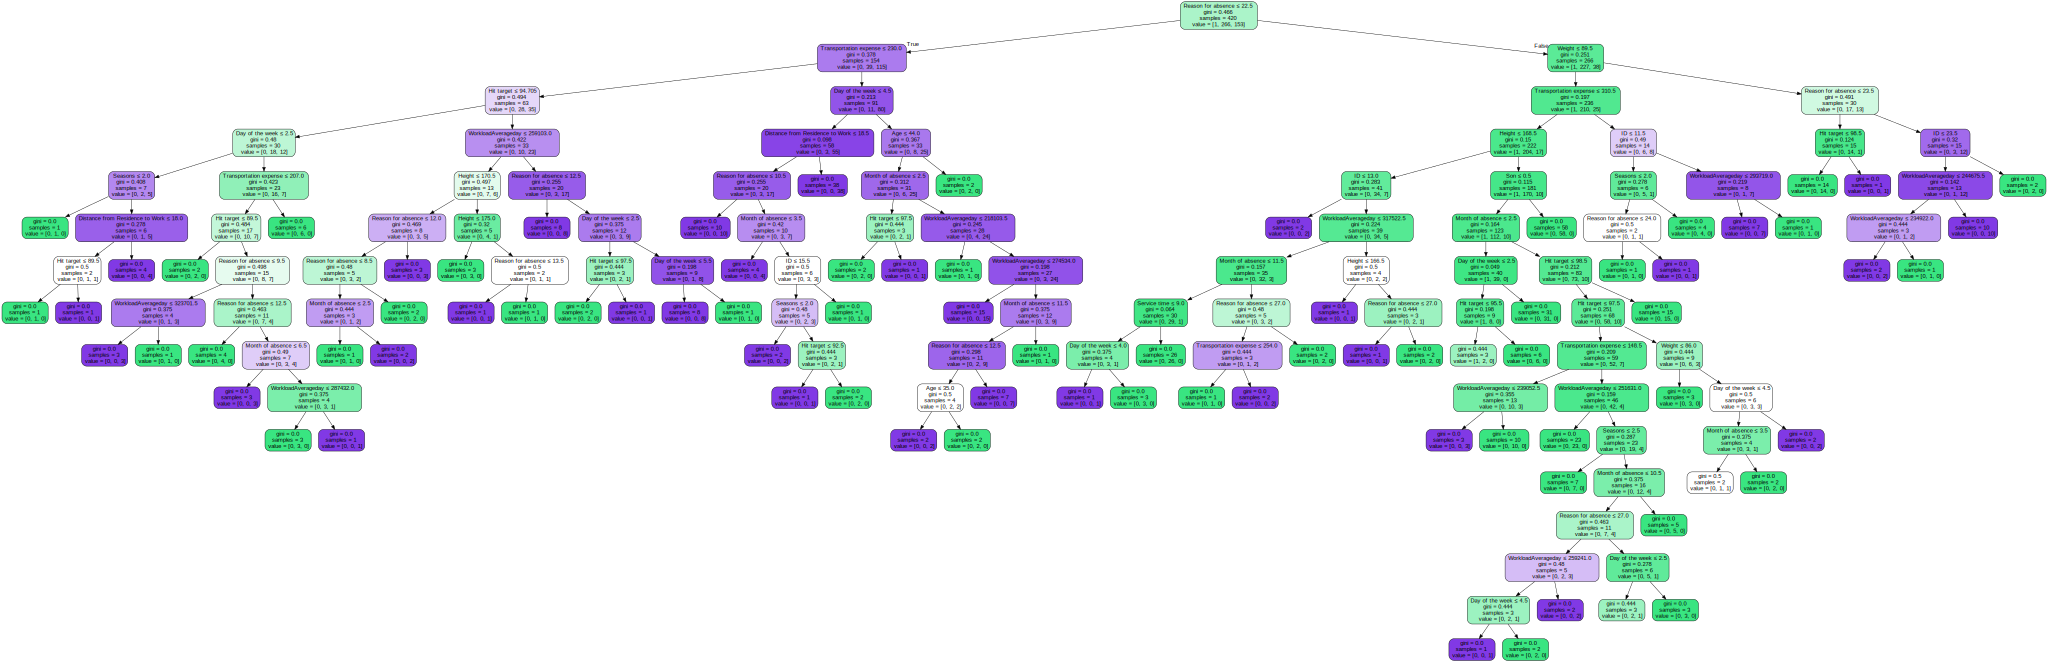

In [31]:
#You may see the regression graph using following commands: 
from graphviz import Source 
dot_data = tree.export_graphviz(model, out_file=None,feature_names=X.columns, filled=True, rounded=True, special_characters=True) 
graph = Source(dot_data) 
graph

In [32]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[58 10]
 [10 27]]
80.95238095238095


In [33]:
#One of the interesting properties of Random forest algorithm is that it lets you see the importance of features.
import pandas as pd 
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Reason for absence,0.333841
Transportation expense,0.091330
WorkloadAverageday,0.084458
Day of the week,0.078035
Hit target,0.068889
Month of absence,0.064616
Age,0.047418
Seasons,0.036047
Distance from Residence to Work,0.033906
Weight,0.032216


In [34]:
from sklearn.metrics import mean_squared_error
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.4364357804719847

In [35]:
# Create correlation matrix 
corr_matrix = X.corr().abs() 
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) 
# Find index of feature columns with correlation greater than 0.60 
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] 
to_drop = []

to_drop

[]

In [36]:
Xnew = X.drop(to_drop, axis=1)
Xnew.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height
0,11,26,7,3,1,289,36,13,33,239554.0,97.0,0,1,2,1,0,1,90.0,172
2,3,23,7,4,1,179,51,18,38,239554.0,97.0,0,1,0,1,0,0,89.0,170
4,11,23,7,5,1,289,36,13,33,239554.0,97.0,0,1,2,1,0,1,90.0,172
5,3,23,7,6,1,179,51,18,38,239554.0,97.0,0,1,0,1,0,0,89.0,170
6,10,22,7,6,1,361,52,3,28,239554.0,97.0,0,1,1,1,0,4,80.0,172


In [37]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.20, random_state=123)

In [38]:
#Step 2: Training a Model on the Data
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb = gnb.fit(X_train, y_train)

In [39]:
#Step 3: Evaluating Model Performance
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

y_predict = gnb.predict(X_test) 
print(confusion_matrix(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict)*100)

[[ 0  0  0]
 [ 1 56 11]
 [ 0 14 23]]
75.23809523809524


In [40]:
from sklearn.metrics import mean_squared_error
import math 
rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.4976133515281193


0.4976133515281193

In [41]:
import warnings
warnings.filterwarnings("ignore")

#Step 3: Training a Model on the Data
from sklearn import svm
#clf = svm.SVC(kernel='linear') 
clf = svm.LinearSVC(C=1) 
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)

In [42]:
#Step 4: Evaluating Model Performance
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[ 0 68]
 [ 0 37]]
35.23809523809524


In [43]:
from sklearn.metrics import mean_squared_error
import math 
rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.8047478161629565


0.8047478161629565

In [44]:
#Step 3: Training a Model on the Data
clf = svm.SVC(kernel = 'rbf',gamma=0.3) 
#clf = svm.LinearSVC(C=1) 
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)

63.8095238095238


In [45]:
from sklearn.metrics import mean_squared_error
import math 
rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.6015852075182383


0.6015852075182383

In [46]:
#Step 3: Training a Model on the Data
clf = svm.SVC(kernel='poly',degree=8,gamma='auto') 
#clf = svm.LinearSVC(C=1) 
clf.fit(X_train, y_train) 
#_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)

63.8095238095238


In [47]:
from sklearn.metrics import mean_squared_error
import math 
rmse= math.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)
RMSE =mean_squared_error(y_predict,y_test)**0.5
RMSE

0.6015852075182383


0.6015852075182383

In [48]:
data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WorkloadAverageday,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,AbsentHrs
0,11,26,7,3,1,289,36,13,33,239554.0,97.0,0,1,2,1,0,1,90.0,172,1
2,3,23,7,4,1,179,51,18,38,239554.0,97.0,0,1,0,1,0,0,89.0,170,1
4,11,23,7,5,1,289,36,13,33,239554.0,97.0,0,1,2,1,0,1,90.0,172,1
5,3,23,7,6,1,179,51,18,38,239554.0,97.0,0,1,0,1,0,0,89.0,170,1
6,10,22,7,6,1,361,52,3,28,239554.0,97.0,0,1,1,1,0,4,80.0,172,2


In [49]:
df1 = data
from sklearn.model_selection import train_test_split
y = df1['AbsentHrs']
X = df1.drop(columns=['AbsentHrs','ID'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [50]:
X_train = X_train.reset_index(drop=True)
X_train.index += 1
X_test = X_test.reset_index(drop=True)
X_test.index += 1
y_train = y_train.reset_index(drop=True)
y_train.index += 1
y_test = y_test.reset_index(drop=True)
y_test.index += 1

In [51]:
df1.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
WorkloadAverageday                 False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
AbsentHrs                          False
dtype: bool

In [52]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test).round(0)

In [53]:
model_lr_dummies = sm.OLS(y_train,X_train).fit()
model_lr_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AbsentHrs   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     338.8
Date:                Wed, 19 Jun 2019   Prob (F-statistic):          1.48e-222
Time:                        09:33:38   Log-Likelihood:                -190.40
No. Observations:                 420   AIC:                             412.8
Df Residuals:                     404   BIC:                             477.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Reason for absence                 -0.0302      0.003    -10.658      0.000      -0.036      -0.025
Month of absence                    0.0041      0.007      0.580      0.562      -0.010       0.018
Day of the week                    -0.0305      0.013     -2.285      0.023      -0.057      -0.004
Seasons                            -0.0185      0.021     -0.881      0.379      -0.060       0.023
Transportation expense              0.0016      0.000      3.443      0.001       0.001       0.002
Distance from Residence to Work    -0.0044      0.002     -2.155      0.032      -0.008      -0.000
Service time                       -0.0057      0.009     -0.614      0.540      -0.024       0.012
Age                                -0.0115      0.005     -2.116      0.035      -0.022      -0.001
WorkloadAverageday               1.076e-06   5.56e-07      1.937      0.053   -1.58e-08    2.17e-06
Hit target                          0.0129      0.007      1.918      0.056      -0.000       0.026
Disciplinary failure             2.987e-17   1.49e-17      2.004      0.046    5.71e-19    5.92e-17
Education                           0.0422      0.039      1.084      0.279      -0.034       0.119
Son                                 0.0491      0.020      2.402      0.017       0.009       0.089
Social drinker                      0.2195      0.076      2.883      0.004       0.070       0.369
Social smoker                    4.123e-17   1.77e-17      2.328      0.020    6.41e-18     7.6e-17
Pet                                -0.0426      0.027     -1.563      0.119      -0.096       0.011
Weight                              0.0066      0.002      2.972      0.003       0.002       0.011
Height                              0.0010      0.004      0.243      0.808      -0.007       0.009
==============================================================================
Omnibus:                       13.620   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.179
Skew:                           0.448   Prob(JB):                     0.000834
Kurtosis:                       3.095   Cond. No.                     5.12e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
train_rmse_lr=sqrt(mean_squared_error(y_train,y_pred_train))
print("train_rmse_lr:")
train_rmse_lr

train_rmse_lr:


0.37865840754093943

In [55]:
y_test[np.isnan(y_test)] = np.median(y_test[~np.isnan(y_test)])
y_pred[np.isnan(y_pred)] = np.median(y_pred[~np.isnan(y_pred)])
test_rmse_lr=sqrt(mean_squared_error(y_test,y_pred))
print("test_rmse_lr:")
test_rmse_lr

test_rmse_lr:


0.4472135954999579

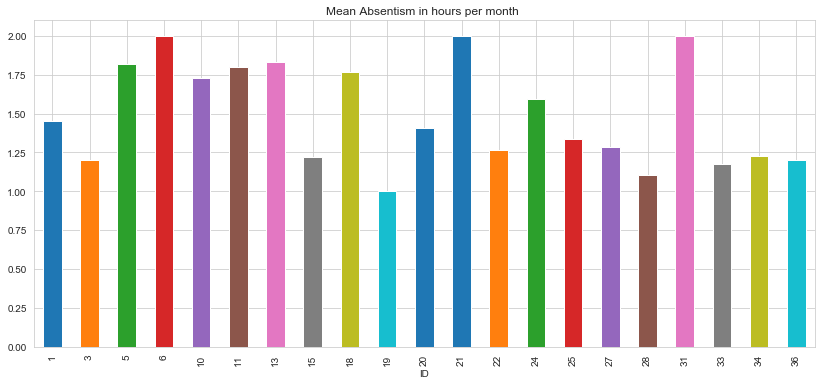

In [56]:
df1.groupby('ID')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours per month ',figsize=(14,6))
plt.show()

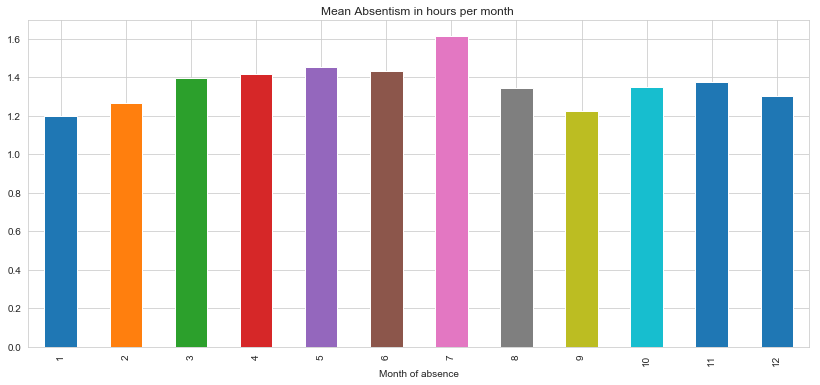

In [57]:
df1.groupby('Month of absence')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours per month ',figsize=(14,6))
plt.show()

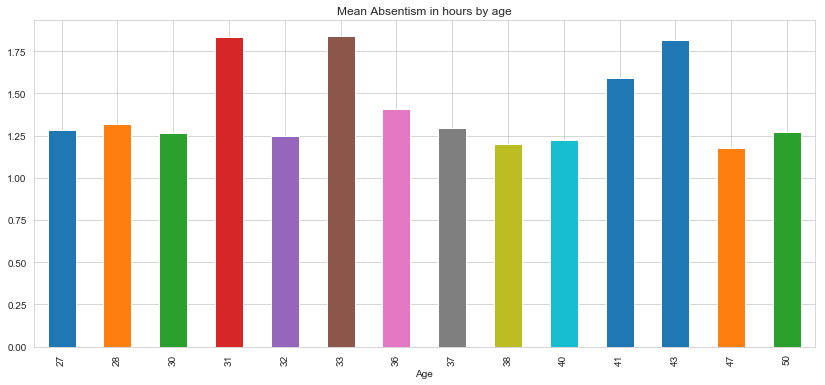

In [58]:
df1.groupby('Age')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours by age',figsize=(14,6))
plt.show()

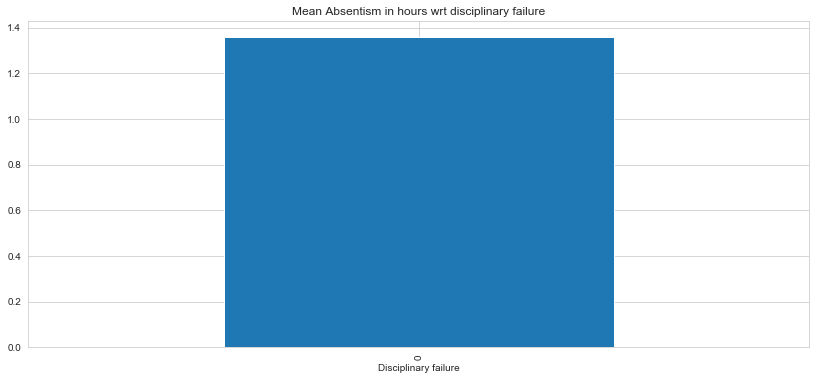

In [59]:
df1.groupby('Disciplinary failure')['AbsentHrs'].mean().plot(kind='bar',title='Mean Absentism in hours wrt disciplinary failure',figsize=(14,6))
plt.show()

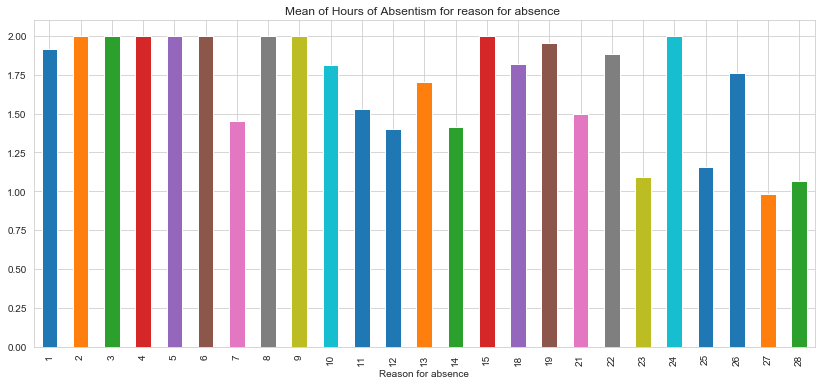

In [60]:
df1.groupby('Reason for absence')['AbsentHrs'].mean().plot(kind='bar',title='Mean of Hours of Absentism for reason for absence ',figsize=(14,6))
plt.show()

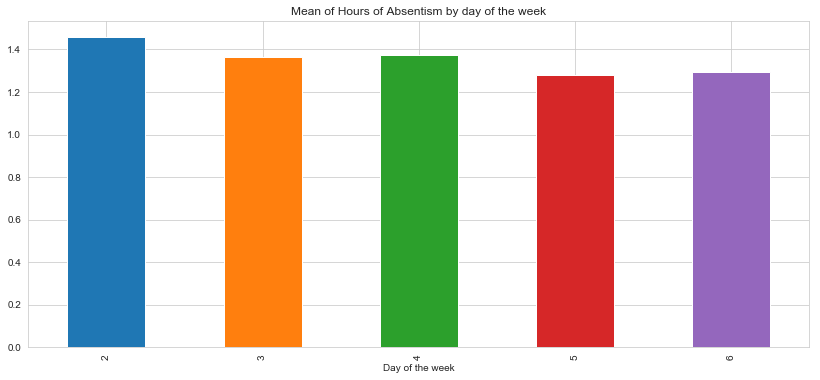

In [61]:
df1.groupby('Day of the week')['AbsentHrs'].mean().plot(kind='bar',title='Mean of Hours of Absentism by day of the week',figsize=(14,6))
plt.show()

ID                                    AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Reason for absence                 AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Month of absence                   AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Day of the week                       AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Seasons                            AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
Transportation expense             AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
Distance from Residence to Work       AxesSubplot(0.125,0.606915;0.227941x0.0803191)
Service time                       AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Age                                AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
WorkloadAverageday                    AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Hit target                         AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Disciplinary failure               AxesSubplot(0.672059,0.510532;

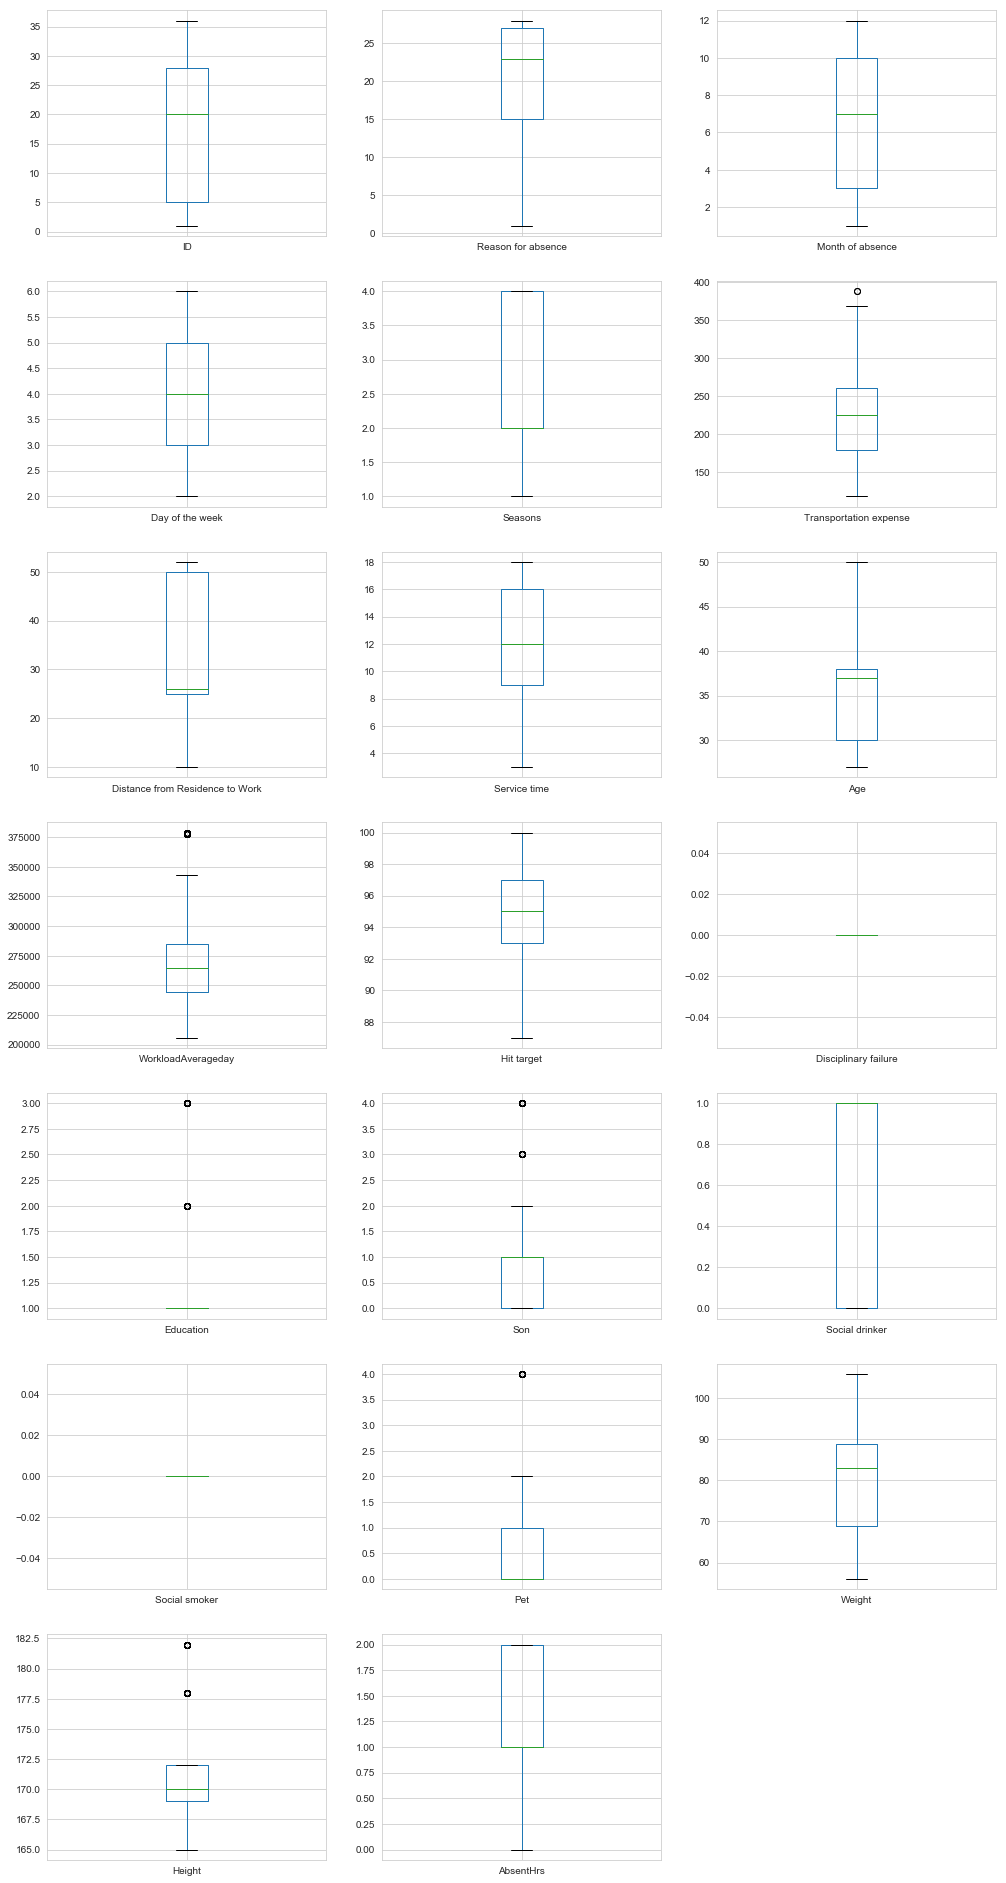

In [62]:
df_num=df1.select_dtypes(['float64','int64'])
df_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf 
cnames = ['Distance from Residence to Work', 'Service time', 'Age', 'WorkloadAverageday', 'Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height','AbsentHrs']
from statsmodels.tools.tools import add_constant
numeric_df = add_constant(data[cnames])
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], 
                 index = numeric_df.columns)
vif

const                              6032.632460
Distance from Residence to Work       1.627498
Service time                          3.929310
Age                                   2.748010
WorkloadAverageday                    1.055012
Transportation expense                2.097670
Hit target                            1.020681
Son                                   1.633846
Pet                                   2.099249
Weight                                2.117892
Height                                1.759854
AbsentHrs                             1.198874
dtype: float64

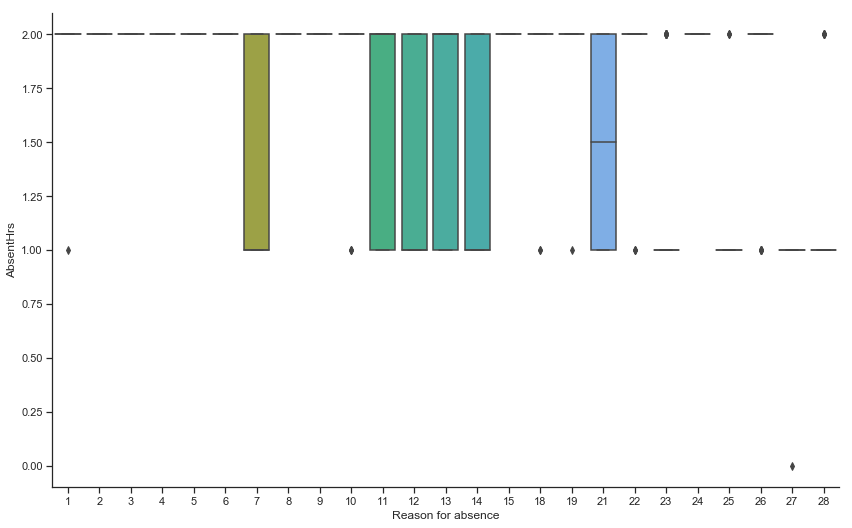

In [64]:

import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.catplot(x='Reason for absence', y="AbsentHrs", kind="box", data=df1,height=7.5,aspect=12/7.5)

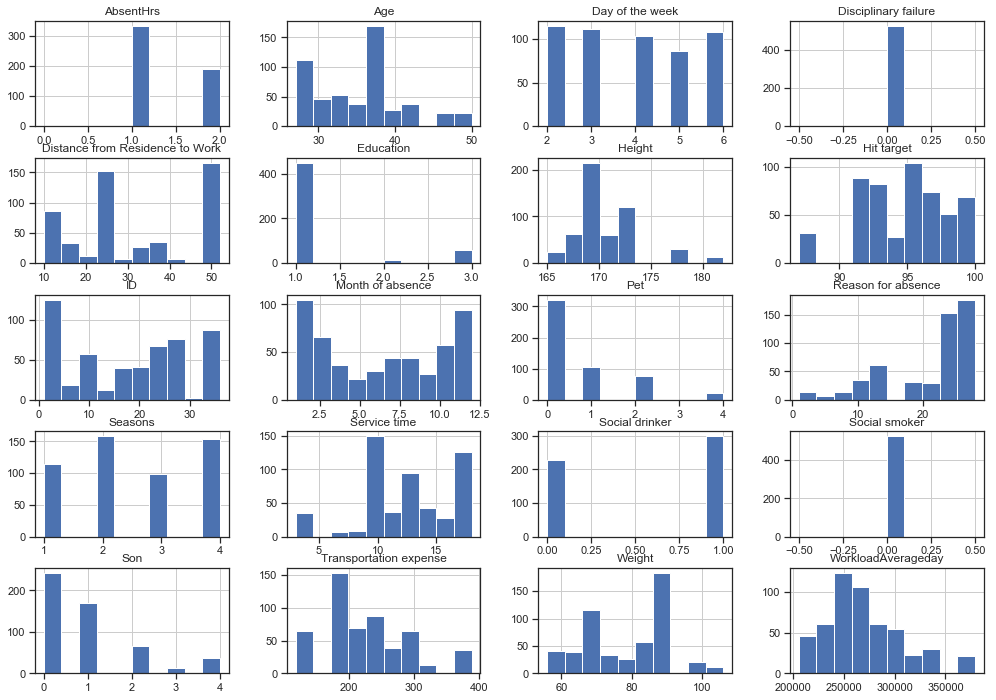

In [65]:
from matplotlib import pyplot
df_num.hist(figsize=(17,12))
pyplot.show()

In [66]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression 
model =LogisticRegression(solver='lbfgs',multi_class='multinomial')
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
from sklearn.metrics import confusion_matrix 
y_predict=model.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[56, 12],
       [13, 24]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_predict)*100

76.19047619047619

In [69]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

regressors = [DecisionTreeClassifier(), GradientBoostingRegressor(), RandomForestRegressor(),
              LinearRegression(),SVR(),KNeighborsRegressor()]

imp_cols=["regressors", "MSE"]
imp = pd.DataFrame(columns=imp_cols)
for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Result-test')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    print('Result-train')
    ori_predictions = rgr.predict(X_train)
    mse_t = np.sqrt(mean_squared_error(y_train, ori_predictions))
    print("RMSE: {}".format(mse_t))
    
    print("="*50)
    imp_entry = pd.DataFrame([[name, mse]], columns=imp_cols)
    imp = imp.append(imp_entry)

DecisionTreeClassifier
Result-test
RMSE: 0.4879500364742666
Result-train
RMSE: 0.08451542547285165
GradientBoostingRegressor
Result-test
RMSE: 0.3511758956120473
Result-train
RMSE: 0.2162855447329395
RandomForestRegressor
Result-test
RMSE: 0.3912054359562162
Result-train
RMSE: 0.165469390062389
LinearRegression
Result-test
RMSE: 0.3824023699453764
Result-train
RMSE: 0.37865840754093943
SVR
Result-test
RMSE: 0.4316682878272595
Result-train
RMSE: 0.13594078498182802
KNeighborsRegressor
Result-test
RMSE: 0.46557695901097246
Result-train
RMSE: 0.39809068122249547


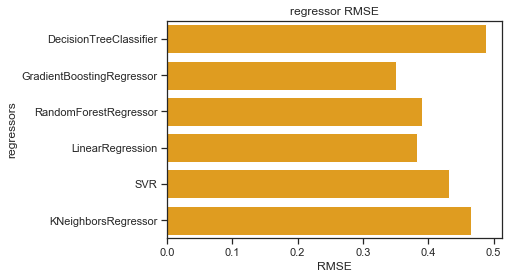

In [70]:
sns.set_color_codes("muted")
sns.barplot(x='MSE', y='regressors', data=imp, color="orange")

plt.xlabel('RMSE')
plt.title('regressor RMSE')
plt.show()

In [71]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn import datasets 
import numpy as np 
iris =datasets.load_iris()
X = data# Sepal and pedal negthand width
from sklearn.preprocessing import scale
x =scale(X)
from sklearn.decomposition import PCA 
pca = PCA(n_components=10)
PC = pca.fit(x)

In [72]:
PC.explained_variance_ratio_

array([0.18709982, 0.14537532, 0.10136438, 0.09953537, 0.0795358 ,
       0.06472349, 0.06079649, 0.0541347 , 0.04263448, 0.03881876])

In [73]:
New_feats=pca.fit_transform(x)

In [74]:
New_feats

array([[-0.97960932,  1.09147408, -0.73848195, ...,  0.29006595,
        -0.18606367, -0.65022719],
       [-2.88252309, -0.21217045, -1.01837404, ..., -0.39777833,
         0.03465798,  0.74082046],
       [-0.92687236,  1.20132046, -0.85677457, ...,  0.9991728 ,
        -0.20464226,  0.13895784],
       ...,
       [ 1.61190328,  3.40615773, -0.45613747, ...,  0.97657054,
         0.70447572, -0.03882768],
       [ 1.04152491, -2.60780269,  0.99944405, ..., -0.32734469,
         0.49367253,  1.44780805],
       [ 0.66700293, -0.78915817,  0.89445402, ...,  0.58881786,
        -0.29100411, -0.60058756]])

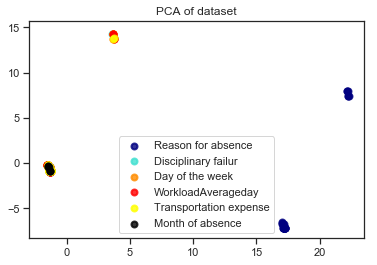

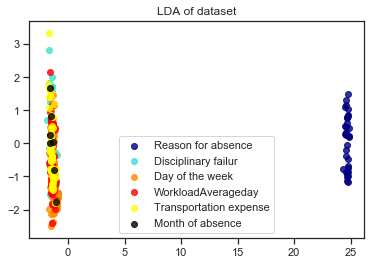

In [75]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = data_abs
target = data[data.keys()[-1]]
X = data.drop(['AbsentHrs'],axis=1)
y = target
target_names = ['Reason for absence','Disciplinary failur','Day of the week','WorkloadAverageday','Transportation expense',
                'Month of absence']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X = sc.fit_transform(X)  
X = sc.transform(X) 

pca=PCA(n_components=6)
X_r=pca.fit(X).transform(X)

lda=LinearDiscriminantAnalysis(n_components=6)
X_r2 =lda.fit(X,y).transform(X)# Percentage of variance explained for each component splt.figure()
lda.explained_variance_ratio_

colors =['navy','turquoise','darkorange','red','yellow','black']
lw=2
for color,i,target_name in zip(colors,[0,1,2,3,4,5],target_names):
    plt.scatter(X_r[y ==i,0],X_r[y ==i,1],color=color,alpha=.8,lw=lw,label=target_name)
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('PCA of dataset')
plt.figure()
for color,i,target_name in zip(colors,[0,1,2,3,4,5],target_names):
    plt.scatter(X_r2[y ==i,0],
                        X_r2[y ==i,1],alpha=.8,color=color,label=target_name)
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.title('LDA of dataset')
plt.show()


In [76]:
lda.explained_variance_ratio_

array([0.96677969, 0.01738899, 0.00398697, 0.00287067, 0.00217019,
       0.00166286])

In [77]:
pca.explained_variance_ratio_

array([0.44875871, 0.33698211, 0.11022709, 0.04055093, 0.01852156,
       0.01578981])

In [78]:
# Finding RMSE and accuracy for the selected model Random Forest

In [79]:
input_file = "C:/MyData Late-Spring/530 Machine Learning/data/Absenteeism_at_work_test.csv" 
data_abs = pd.read_csv(input_file)
data_abs.shape

(74, 21)

In [80]:
#data["WorkloadAverageday"] = data.WorkloadAverageday.replace(',', '')
#data["WorkloadAverageday"] = data['WorkloadAverageday'].astype('float')
#data["WorkloadAverageday"] = float(data["WorkloadAverageday"]) # turn from string to float.
# convert X into dataframe
X_pd = pd.DataFrame(data = data_abs.WorkloadAverageday)
# replace all instances of URC with 0 
X_replace = X_pd.replace(',','', regex=True)
# convert it back to numpy array
X_np = X_replace.values
# set the object type as float
X_fa = X_np.astype('float64')
data_abs["WorkloadAverageday"] = X_fa 
data_abs.dtypes
del data_abs['Body mass index']
data_abs.rename(columns={'Absenteeism time in hours':'AbsentHrs','Work load Average/day':'WorkloadAverageday'}, inplace=True)

In [81]:
import numpy as np
data_abs[data_abs==np.inf]=np.nan
data_abs.fillna(data_abs.mean(), inplace=True)
#data.fillna(0)
data = data_abs
target = data['AbsentHrs']
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
hrs_label = pd.Series(label_encoder.fit_transform(target>6))
import numpy as np
x = data.AbsentHrs > 0
y = data.AbsentHrs <= 6 
Grp1 = np.logical_and(x, y)
Grp2 = data.AbsentHrs > 6
Grp0 = (data.AbsentHrs == 0)

data.loc[Grp2,'AbsentHrs'] = 2
data.loc[Grp1,'AbsentHrs'] = 1
data.loc[Grp0,'AbsentHrs'] = 0

target = data[data.keys()[-1]]
from sklearn.model_selection import train_test_split 
y = target 
X = data.drop(['AbsentHrs'],axis=1)

In [82]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[0 1 1]
 [0 6 2]
 [0 1 4]]
66.66666666666666


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

regressors = [RandomForestRegressor(),
              LinearRegression()]

imp_cols=["regressors", "MSE"]
imp = pd.DataFrame(columns=imp_cols)
for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Result-test')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    print('Result-train')
    ori_predictions = rgr.predict(X_train)
    mse_t = np.sqrt(mean_squared_error(y_train, ori_predictions))
    print("RMSE: {}".format(mse_t))
    
    print("="*50)
    imp_entry = pd.DataFrame([[name, mse]], columns=imp_cols)
    imp = imp.append(imp_entry)

RandomForestRegressor
Result-test
RMSE: 0.5162543157383951
Result-train
RMSE: 0.20014707398337223
LinearRegression
Result-test
RMSE: 0.7812452093289913
Result-train
RMSE: 0.32558217860002525


In [84]:
df1 = data_abs
from sklearn.model_selection import train_test_split
y = df1['AbsentHrs']
X = df1.drop(columns=['AbsentHrs','ID'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

X_train = X_train.reset_index(drop=True)
X_train.index += 1
X_test = X_test.reset_index(drop=True)
X_test.index += 1
y_train = y_train.reset_index(drop=True)
y_train.index += 1
y_test = y_test.reset_index(drop=True)
y_test.index += 1

df1.isnull().any()

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test).round(0)
model_lr_dummies = sm.OLS(y_train,X_train).fit()
model_lr_dummies.summary()
##Linear Regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AbsentHrs   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     42.98
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           6.02e-21
Time:                        09:33:50   Log-Likelihood:                -17.919
No. Observations:                  59   AIC:                             71.84
Df Residuals:                      41   BIC:                             109.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Reason for absence                 -0.0124      0.008     -1.478      0.147      -0.029       0.005
Month of absence                    0.0713      0.088      0.814      0.420      -0.106       0.248
Day of the week                    -0.0116      0.049     -0.238      0.813      -0.110       0.087
Seasons                             0.2810      0.100      2.810      0.008       0.079       0.483
Transportation expense             -0.0002      0.001     -0.156      0.877      -0.003       0.003
Distance from Residence to Work     0.0064      0.014      0.468      0.643      -0.021       0.034
Service time                       -0.1262      0.048     -2.604      0.013      -0.224      -0.028
Age                                 0.0290      0.015      1.934      0.060      -0.001       0.059
WorkloadAverageday               7.788e-06   4.92e-06      1.582      0.121   -2.15e-06    1.77e-05
Hit target                         -0.0164      0.017     -0.981      0.332      -0.050       0.017
Disciplinary failure               -1.8520      0.280     -6.617      0.000      -2.417      -1.287
Education                           0.0755      0.082      0.916      0.365      -0.091       0.242
Son                                 0.5988      0.208      2.875      0.006       0.178       1.019
Social drinker                      0.0009      0.209      0.004      0.996      -0.422       0.424
Social smoker                       0.1858      0.259      0.716      0.478      -0.338       0.710
Pet                                -0.1439      0.086     -1.679      0.101      -0.317       0.029
Weight                              0.0097      0.008      1.154      0.255      -0.007       0.027
Height                             -0.0045      0.011     -0.396      0.694      -0.028       0.019
==============================================================================
Omnibus:                        0.991   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.997
Skew:                           0.171   Prob(JB):                        0.607
Kurtosis:                       2.463   Cond. No.                     1.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
#from sklearn.metrics import roc_curve, auc
#fpr, tpr, _ = roc_curve(y, y_pred)
#roc_auc = auc(fpr, tpr)

In [86]:
train_rmse_lr=sqrt(mean_squared_error(y_train,y_pred_train))
print("test_rmse_lr:")
train_rmse_lr

test_rmse_lr:


0.32558901600799134